In [3]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2022-01-01')
apple = pdr.get_data_yahoo('AAPL', start='2022-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# 삼성전자 일일 데이터 확인하기
sec.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,78800.0,79200.0,78300.0,78700.0,77288.398438,12427416
2022-01-05,78800.0,79000.0,76400.0,77400.0,76011.710938,25470640
2022-01-06,76700.0,77600.0,76600.0,76900.0,75520.679688,12931954
2022-01-07,78100.0,78400.0,77400.0,78300.0,76895.570312,15163757
2022-01-10,78100.0,78100.0,77100.0,78000.0,76600.960938,9947422
2022-01-11,78400.0,79000.0,78000.0,78900.0,77484.804688,13221123
2022-01-12,79500.0,79600.0,78600.0,78900.0,77484.804688,11000502
2022-01-13,79300.0,79300.0,77900.0,77900.0,76502.742188,13889401
2022-01-14,77700.0,78100.0,77100.0,77300.0,75913.507812,10096725


In [5]:
# apple 일일 데이터 확인하기
apple.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.959732,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.663071,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910660,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007492,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176529,86709100
2022-01-10,169.080002,172.500000,168.169998,172.190002,171.196426,106765600
2022-01-11,172.320007,175.179993,170.820007,175.080002,174.069748,76138300
2022-01-12,176.119995,177.179993,174.820007,175.529999,174.517120,74805200
2022-01-13,175.779999,176.619995,171.789993,172.190002,171.196426,84505800


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


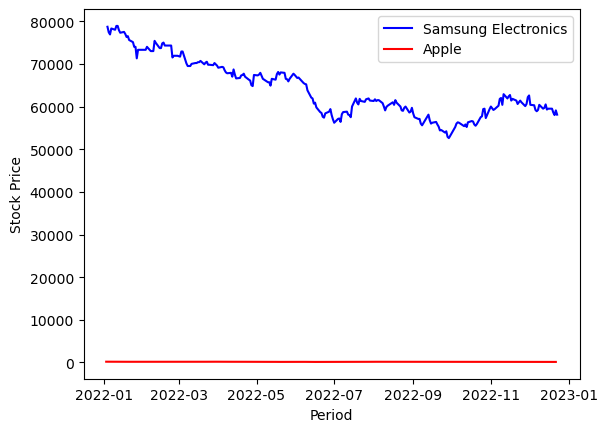

In [9]:
import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

yf.pdr_override()

# 삼성전자, 애플 주식 정보 가져오기
sec = pdr.get_data_yahoo('005930.KS', start='2022-01-01')
apple = pdr.get_data_yahoo('AAPL', start='2022-01-01')

# 종가 비교 그래프 그리기
plt.plot(sec.index, sec.Close, 'b', label='Samsung Electronics')
plt.plot(apple.index, apple.Close, 'r', label='Apple')
plt.xlabel('Period')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [10]:
# 삼성전자 종가 확인하기
sec['Close']

Date
2022-01-04    78700.0
2022-01-05    77400.0
2022-01-06    76900.0
2022-01-07    78300.0
2022-01-10    78000.0
               ...   
2022-12-19    59500.0
2022-12-20    58600.0
2022-12-21    58000.0
2022-12-22    59100.0
2022-12-23    58100.0
Name: Close, Length: 240, dtype: float64

In [11]:
# 삼성전자 종가 확인하기
sec['Close'].shift()

Date
2022-01-04        NaN
2022-01-05    78700.0
2022-01-06    77400.0
2022-01-07    76900.0
2022-01-10    78300.0
               ...   
2022-12-19    59500.0
2022-12-20    59500.0
2022-12-21    58600.0
2022-12-22    58000.0
2022-12-23    59100.0
Name: Close, Length: 240, dtype: float64

In [14]:
# 삼성전자 일간 변동률 구하기
sec_dpc = (sec['Close']/sec['Close'].shift(1) - 1) * 100

# 첫 값 NaN 값 0으로 변경
sec_dpc.iloc[0] = 0

# 삼성전자 일간변동률 확인
sec_dpc.head(5)

Date
2022-01-04    0.000000
2022-01-05   -1.651842
2022-01-06   -0.645995
2022-01-07    1.820546
2022-01-10   -0.383142
Name: Close, dtype: float64

In [15]:
# 애플 일간 변동률 구하기
apple_dpc = (apple['Close']/apple['Close'].shift(1) - 1) * 100

# 첫 값 NaN 값 0으로 변경
apple_dpc.iloc[0] = 0

# 애플 일간변동률 확인
apple_dpc.head(5)

Date
2022-01-03    0.000000
2022-01-04   -1.269160
2022-01-05   -2.659988
2022-01-06   -1.669334
2022-01-07    0.098836
Name: Close, dtype: float64

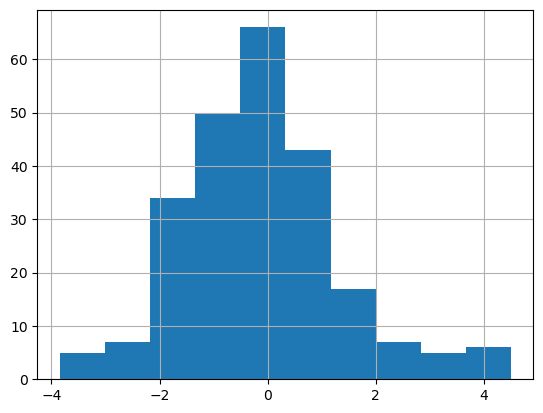

In [16]:
# 삼성전자 종가 일간 변동률 히스토그램
import matplotlib.pyplot as plt

# 삼성전자 일간 변동률 구하기
sec_dpc = (sec['Close']/sec['Close'].shift(1) - 1) * 100

# 첫 값 NaN 값 0으로 변경
sec_dpc.iloc[0] = 0

# 히스토그램 그리기
plt.hist(sec_dpc, bins=10)
plt.grid(True)
plt.show()


In [18]:
sec_dpc.describe()

count    240.000000
mean      -0.115830
std        1.457363
min       -3.840878
25%       -1.066690
50%       -0.145679
75%        0.562642
max        4.496403
Name: Close, dtype: float64

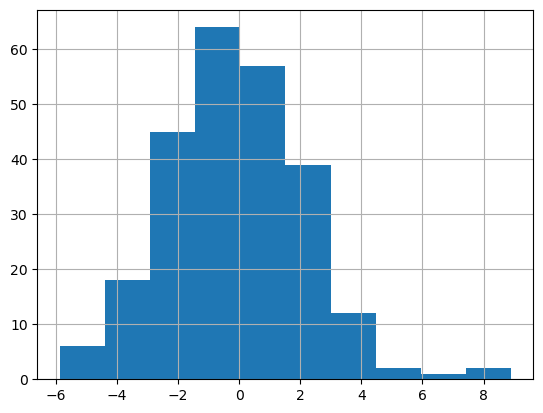

In [17]:
# 애플 일간 변동률 구하기
apple_dpc = (apple['Close']/apple['Close'].shift(1) - 1) * 100

# 첫 값 NaN 값 0으로 변경
apple_dpc.iloc[0] = 0

# 히스토그램 그리기
plt.hist(apple_dpc, bins=10)
plt.grid(True)
plt.show()

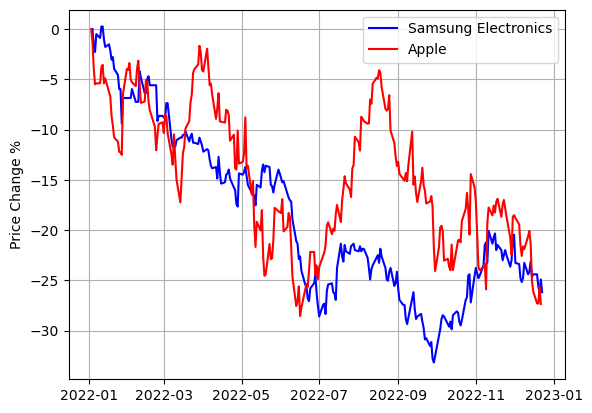

In [20]:
## 삼성전자, 애플 종가 누적 변동률 히스토그램
# 삼성전자 일간 변동률 구하기
sec_dpc = (sec['Close']/sec['Close'].shift(1) - 1) * 100
# 첫 값 NaN 값 0으로 변경
sec_dpc.iloc[0] = 0
# cumprod = 일간변동률 누적곱
sec_dpc_cp = ((100+sec_dpc)/100).cumprod()*100 - 100


# 애플 일간 변동률 구하기
apple_dpc = (apple['Close']/apple['Close'].shift(1) - 1) * 100
# 첫 값 NaN 값 0으로 변경
apple_dpc.iloc[0] = 0
# cumprod = 일간변동률 누적곱
apple_dpc_cp = ((100+apple_dpc)/100).cumprod()*100 - 100

# 히스토그램 그리기
plt.plot(sec.index, sec_dpc_cp, 'b', label='Samsung Electronics')
plt.plot(apple.index, apple_dpc_cp, 'r', label='Apple')
plt.ylabel('Price Change %')
plt.grid(True)
plt.legend(loc = 'best') # 범례 왼쪽 위로
plt.show()

In [ ]:
import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

yf.pdr_override()

# 삼성전자, 애플 주식 정보 가져오기
sec = pdr.get_data_yahoo('005930.KS', start='2022-01-01')
apple = pdr.get_data_yahoo('AAPL', start='2022-01-01')